### ❓부분 코드 채워 넣기 ! 
- 나머지 코드 cell은 주석 읽어본 뒤 실행, 결과 확인하기 !

# 자연어 처리 모델링 프로세스

1. **데이터 수집**
    - **Corpus(말뭉치)**: 자연어 학습을 위해 수집한 언어 표본 집합을 "말뭉치" 또는 "Corpus"라고 한다.
    - **수집 방법**
        - 공개 데이터 사용
        - 데이터 구매
        - 웹 크롤링

2. **텍스트 전처리**
     - 분석 목적에 맞게 텍스트를 전처리한다.
     - **정제 (Cleaning)**
       - 문서 내 노이즈(불필요한 문자, 기호, 빈도가 낮은 단어 등)를 제거한다.
       - 불용어(Stop word) 제거: 분석에 불필요한 단어(예: "의", "에", "은" 등)를 삭제하여 모델 성능을 향상시킨다.
     - **정규화 (Normalization)**
       - 같은 의미의 단어들을 하나의 형태로 통일한다. (예: "말하다", "말하면", "말하기" → "말")
       - **주요 기법**
         - 어간 추출 (Stemming), 원형 복원 (Lemmatization), 형태소 분석

3. **텍스트 토큰화**
    - 문서의 텍스트를 분석하기 위해 최소 단위로 나누는 작업이다.
    - 보통 단어 단위나 글자 단위로 나누며, 토큰을 기계가 이해할 수 있도록 정수 형태로 변환한다.

4. **임베딩**
    - 각 토큰(단어)의 의미나 특성을 보다 잘 표현할 수 있도록 단어를 고차원 벡터로 변환한다.
    - Feature Extraction(특성 추출)과정이라고 볼 수 있다.
    - 빈도수 기반 통계적 방식과 뉴럴 네트워크를 이용한 학습 방식이 있다.
    - **주요 기법**
      - TF-IDF, Word2Vec, FastText

5. **모델링**
    - 임베딩된 데이터를 입력으로 받아 자연어 관련 문제를 해결하는 머신러닝 또는 딥러닝 모델을 구현한다.

# NLTK 
- Natural Language ToolKit
- https://www.nltk.org/
- 자연어 처리를 위한 대표적인 파이썬 패키지. 한국어는 지원하지 않는다.

## NLTK 설치
- nltk 패키지 설치
    - `pip install nltk`
- NLTK 추가 패키지 설치
```python
import nltk
nltk.download() # 설치 GUI 프로그램 실행을 실행해 다운로드
nltk.download('패키지명')
```

## NLTK 주요기능

- ### 텍스트 토큰화/정규화/전처리등 처리를 위한 기능 제공
    - 토큰화(Tokenization)
    - Stop word(불용어) 제공
    - 형태소 분석
        - 형태소
            - 의미가 있는 가장 작은 말의 단위
        - 형태소 분석
            - 말뭉치에서 의미있는(분석시 필요한) 형태소들만 추출하는 것           
        - 어간추출(Stemming)
        - 원형복원(Lemmatization)
        - 품사부착(POS tagging - Part Of Speech)
        
- ### 텍스트 분석 기능을 제공

# NLTK 텍스트 정규화 기본 문법

## Tokenization (토큰화)

- 문자열을 분석의 최소단위(Token)으로 나누는 작업.
- 글자단위, 단어단위, 형태소 단위, 문장단위 등 다양 방식으로 나눌 수있다.
- 분석을 위해 문서를 작은 단위로 나누는 작업.
- **주요 Tokenizer (함수)**
    - **sent_tokenize()** : 문장단위로 나눠준다.
    - **word_tokenize()** : 단어단위로 나눠준다.
    - **regexp_tokenize()** : 토큰의 단위를 정규표현식으로 지정
    - return: 분리된 토큰들을 원소로 하는 list

In [64]:
# 먼저 실행하시고 시작하시길!
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet	# WordNetLemmatizer에서 지정할 수 있는 품사 목록
from nltk.tag import pos_tag

### 1. word_tokenize
- 내부적으로 **PunktSentenceTokenizer + TreebankWordTokenizer** 를 사용.
- 이 토크나이저는 유니코드 구두점 문자(예: `’`) 도 구두점으로 인식해서 따로 분리함.
- 그래서 **'Life’s' → 'Life', ’, 's'** 로 나뉨.

### 2. TreebankWordTokenizer
- 규칙 기반의 전통적인 영어 토크나이저.
- 하지만 `’` 같은 유니코드 스마트 따옴표는 일반 ASCII `'`처럼 인식하지 못해서,
- **'Life’s'** 를 통째로 하나의 단어로 봄.
<br>


|`'`|`＇`|`’`|
|-|-|-|
|U+0027|U+FF07|U+2019



In [66]:
# 어떻게 다르게 토큰이 나눠지는지 출력 보기
txt = "Life’s wonderfull, It can't disagree."
word_tokens1 = nltk.word_tokenize(txt)
tokenizer = nltk.TreebankWordTokenizer()
word_tokens2 = tokenizer.tokenize(txt)

len(word_tokens1), len(word_tokens2), word_tokens1, word_tokens2

(10,
 8,
 ['Life', '’', 's', 'wonderfull', ',', 'It', 'ca', "n't", 'disagree', '.'],
 ['Life’s', 'wonderfull', ',', 'It', 'ca', "n't", 'disagree', '.'])

In [67]:
def tokenize_text(text):
    """
    전달받은 text 토큰화해 반환하는 함수
    문장별로 단어 리스트(의미를 파악하는데 중요한 단어들)를 2차원 배열 형태로 반환
       1차원: 문장 리스트, 2차원: 문장내 토큰.
    구두점/특수문자, 숫자, 불용어(stop words)들은 모두 제거한다.
    parameters:
        text: string - 변환하려는 전체문장
    return:
        2차원 리스트. 1차원: 문장 리스트, 2차원: 문장내 토큰.
    """
    # cleaning
    ## 1. 소문자로 변환 : 대소문자를 구분해버리면 같은 단어라도 다르게 분류되니 통일!
	# low,,, up,, lower,, upper,,,
    text = text.lower()
    ## 2. 문장 단위 토큰화 
	# 문장이니까 sent, 토큰화니까 tokenize가 들어가면 좋겠죠~
    sent_list = nltk.sent_tokenize(text)
    ## 3. stopword(불용어) 사전 생성 stopwords.words("english")
    stopword_list = stopwords.words("english")
    ## 4. stopword 사전에 불용어 추가(옵션)
    # ["although", "nuless", "may"]를 추가 해볼까요 ?
    stopword_list.extend(["although", "nuless", "may"])
	# 특수 문자도 추가해봅시다 string.punctuation = "!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"
    stopword_list.extend(list(string.punctuation))	# list 형태로 넣어야 차곡차곡 들어감
    
    # cleaning + 토큰화
    result_list = []
    for sent in sent_list:  # 문장 단위로 토큰화 + 전처리할려고 문장을 하나씩 가져오는 루프
        word_list = nltk.word_tokenize(sent) 	# 문장 단위로 가져왔으니 이제 단어(word) 단위 토큰화(tokenize)를 해줘야겠죠 ?
        # 불용어 제거
        # 컴프리핸션이 익숙치 않을 수도 있지만 읽어보면 읽힌답니다 ? 저도 방금 읽음
        # w를 word_list에서 가져오는데 그게 if 불용어 사전에 없으면 word_list로 선언
        word_list = [w for w in word_list if w not in stopword_list]
        # 선언 해주고 하나씩 append하면 list가 쨘하고 나오겠죠~? 
        result_list.append(word_list)
        
		
    return result_list

In [68]:
# 얘를 넣어서 함수가 잘 만들어졌는지 확인해 봅시당
text_sample = """Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

tokenize_text(text_sample)

[['beautiful', 'better', 'ugly'],
 ['explicit', 'better', 'implicit'],
 ['simple', 'better', 'complex'],
 ['complex', 'better', 'complicated'],
 ['flat', 'better', 'nested'],
 ['sparse', 'better', 'dense'],
 ['readability', 'counts'],
 ['special', 'cases', "n't", 'special', 'enough', 'break', 'rules'],
 ['practicality', 'beats', 'purity'],
 ['errors', 'never', 'pass', 'silently'],
 ['unless', 'explicitly', 'silenced'],
 ['face', 'ambiguity', 'refuse', 'temptation', 'guess'],
 ['one', '--', 'preferably', 'one', '--', 'obvious', 'way'],
 ['way', 'obvious', 'first', 'unless', "'re", 'dutch'],
 ['better', 'never'],
 ['never', 'often', 'better', 'right'],
 ['implementation', 'hard', 'explain', "'s", 'bad', 'idea'],
 ['implementation', 'easy', 'explain', 'good', 'idea'],
 ['namespaces', 'one', 'honking', 'great', 'idea', '--', 'let', "'s"]]

## 한국어에서 토큰화가 어려운 이유
- 영어는 띄어쓰기(공백)을 기준으로 토큰화를 진행해도 큰 문제가 없다.
- 한국어는 교착어이기 때문에 띄어쓰기를 기준으로 토큰화를 하면 같은 단어가 다른 토큰으로 인식되어 여러개 추출되는 문제가 발생한다.
    - 예) "그가", "그는", "그의", "그와" 모두 "그"를 나타내지만 붙은 조사가 달라 다 다른 토큰으로 추출되게 된다.
- 그래서 한국어는 어절 단위 토큰화는 하지 않도록 한다.
- 대신 형태소에 기반한 토큰화를 하는 것이 좋다.

## 형태소(morpheme) 분석
- 형태소
    - 일정한 의미가 있는 가장 작은 말의 단위
- 형태소 분석  
    - 말뭉치에서 의미있는(분석에 필요한) 형태소들만 추출하는 것
    - 보통 단어로 부터 어근, 접두사, 접미사, 품사등 언어적 속성을 파악하여 처리한다. 
- 형태소 분석을 위한 기법
    - 어간추출(Stemming)
    - 원형(기본형) 복원 (Lemmatization)
    - 품사부착 (POS tagging - Part Of Speech)

### 어간추출(Stemming)
- 어간: 활용어에서 변하지 않는 부분
    - painted, paint, painting → 어간: paint
    - 보다, 보니, 보고 → 어간: `보`
- 어간 추출 목적
    - 같은 의미를 가지는 단어의 여러가지 활용이 있을 경우 다른 단어로 카운트 되는 문제점을 해결한다.
        - flower, flowers 가 두개의 단어로 카운트 되는 것을 flower로 통일한다.        
- nltk의 주요 어간 추출 알고리즘
    - Porter Stemmer
    - Lancaster Stemmer
    - Snowball Stemmer
- 메소드
    - `stemmer객체.stem(단어)`
- stemming의 문제
    - 완벽하지 않다는 것이 문제이다.        
        - ex) new와 news는 다른 단어 인데 둘다 new로 처리한다.
    - 처리후 눈으로 직접 확인해야 한다.

 ### **어간과 형태소의 차이**
-  **형태소** : 의미(뜻)을 가진 가장 작은 언어의 단위, 더 이상 나눌 수 없는 언어의 조각 단위. 형태소는 그 자체로 의미를 가지며 단어를 형성하거나 변형 시키는데 사용한다.
	- 자립 형태소:  명사, 동사, 형용사 같이 **독립적**으로 사용될 수 있는 형태소
		- 나, 너, 택시, 가다, you, have
	- 의존 형태소: 조사, 접미사, 접두사 같이 다른 형태소와 **결합해서 사용** 되야 하는 형태소.
		- \~의, \~가, un\~, \~able
-  **어간** :  어간은 접미사나 다른 변화 형태가 추가되기 전의 **단어 기본 형태**를 말한다. 즉 활용시 변하지 않는 부분을 말한다.
	- **view** + ing, **view** + er
	- **먹** + 습니다.  **먹** + 었다.  **먹** + 고
	- **예쁘**  + 다, **예쁘**+ 고, **예쁘** + 지만, **예쁘**+ 어서(예뻐서)

- **어간**은 특정 단어에서 그 단어의 핵심 의미를 담은 부분. 형태소에서 주로 자립 형태소에 해당하고 어미와 같은 의존 형태소가 결합하여 문법적 기능이나 형태를 변화시킬 수 있다.
-  **형태소**는 의미를 구성하는 기본 단위로서의 역할을 하며, **어간**은 특히 단어를 형성하고 변형 시키는 기반으로서의 역할을 한다.

##  NLTK에서 지원하는 주요 Stemmer

### 지원 Stemmer 목록

| Stemmer            | 설명                                       | 
|-|-|
| **PorterStemmer**   | 가장 고전적인 스테머 (Porter 알고리즘)       |
| **LancasterStemmer**| 더 강력하고 과감한 알고리즘                  |
| **SnowballStemmer** | Porter의 개선판, 다국어 지원                |
| **RegexpStemmer**   | 정규표현식을 이용한 사용자 정의 스테머       | 

<br>

###  NLTK 주요 Stemmer 비교표

| Stemmer | 특징 | 장점 | 단점 | 추천 사용 경우 |
|--------|------|------|------|----------------|
| **PorterStemmer** | 고전적인 규칙 기반 스테머.<br> 비교적 보수적인 축약. | - 간단하고 가벼움<br>- 널리 사용됨<br>- 빠른 처리 속도 | - 일부 축약이 너무 약함<br>- 오래된 규칙 기반으로 최신 용도엔 제한 | - 고전적인 NLP 실험<br>- 빠른 전처리 필요할 때 |
| **LancasterStemmer** | 매우 공격적인 어간 축약 방식 | - 처리 속도 빠름<br>- 희소성 극복에 유리<br>- 구현 간단 | - 과도한 축약으로 의미 손실 큼<br>- 축약 결과 해석이 어려움 | - 차원을 줄여 복잡도 감소와 같은 효과를 보기위해<br>- 리소스가 매우 제한된 환경 |
| **SnowballStemmer** | Porter의 개선판. 더 정밀하고 다양한 언어 지원 | - 의미 보존력 우수<br>- 다국어 지원<br>- 규칙과 코드가 정교함 | - Porter보다 약간 느림<br>- 구현 복잡성 ↑ | - 정밀한 전처리가 필요한 경우<br>- 다국어 텍스트 처리 |


In [69]:
# 아래 3개 stemmer 실행하면서 결과 비교해보기
words = [
    "Working",
    "works",
    "worked",
    "Painting",
    "Painted",
    "paints",
    "Happy",
    "happier",
    "happiest",
    "am",
    "are",
    "is"
]

In [70]:
# PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(word) for word in words]

['work',
 'work',
 'work',
 'paint',
 'paint',
 'paint',
 'happi',
 'happier',
 'happiest',
 'am',
 'are',
 'is']

In [71]:
# LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(word) for word in words]
# 확실히 공격적

['work',
 'work',
 'work',
 'paint',
 'paint',
 'paint',
 'happy',
 'happy',
 'happiest',
 'am',
 'ar',
 'is']

In [72]:
# SnowballStemmer
stemmer = SnowballStemmer("english") # 얘는 언어 설정 해줘야함 !
[stemmer.stem(word) for word in words]

['work',
 'work',
 'work',
 'paint',
 'paint',
 'paint',
 'happi',
 'happier',
 'happiest',
 'am',
 'are',
 'is']

### 원형(기본형)복원(Lemmatization)
- 단어의 원형(기본형)을 반환한다.
    - ex) am, is, are => be
- 단어의 품사를 지정하면 정확한 결과를 얻을 수 있다. 
- `WordNetLemmatizer객체.lemmatize(단어 [, pos=wordnet.(품사)])`
	- 품사 : NOUN(명사), ADJ(형용사), VERB(동사)

In [73]:
words

['Working',
 'works',
 'worked',
 'Painting',
 'Painted',
 'paints',
 'Happy',
 'happier',
 'happiest',
 'am',
 'are',
 'is']

In [74]:
lemm = WordNetLemmatizer()
for word in words:
	print(lemm.lemmatize(word, pos=wordnet.ADJ))	# lemmatize 메소드,
	   												# 품사(NOUN, ADJ, VERB, ADV)들을 넣어보며 결과값을 확인해봅시다!

Working
works
worked
Painting
Painted
paints
Happy
happy
happy
am
are
is


### 어간추출과 원형복원의 장단점

- **원형 복원 (Lemmatization)**

   - **장점**:
      - 문맥과 품사를 고려하여 정확한 사전적 원형을 반환하므로 의미적으로 정확한 결과를 얻을 수 있다.
      - 품사 정보를 유지하기 때문에 의미론적 분석에 유리하다.
   - **단점**:
      - 형태소 분석과 사전 조회 과정이 필요하기 때문에 어간 추출보다 처리속도가 느리다.
      - 구현이 더 복잡하며, 품사 태깅 및 사전 데이터베이스가 필요하다.

- **어간 추출 (Stemming)**

   - **장점**:
     - 규칙 기반 알고리즘으로 동작하므로 처리속도가 빠르다.
     - 처리속도가 빠르므로 대량의 텍스트를 효율적으로 처리할 수 있다.
     - 정보 검색이나 텍스트 분류 등 단순한 텍스트 정규화 작업에 적합하다
   - **단점**:
      - 문법적 차이를 고려하지 않고 기계적으로 자르기 때문에 의미 손실이 발생하거나 다른 단어들이 같은 어간으로 추출될 수 있다.


### 품사부착-POS Tagging(Part-Of-Speech Tagging)
- 형태소에 품사를 붙이는 작업.
    - 품사의 구분이나 표현은 언어, 학자마다 다르다. 
- NLTK는 [펜 트리뱅크 태그세트](https://bluebreeze.co.kr/1357)(Penn Treebank Tagset) 이용
    - **명사** : N으로 시작 (NN-일반명사, NNP-고유명사)
    - **형용사** : J로 시작 (JJ, JJR-비교급, JJS-최상급)
    - **동사**: V로 시작 (VB-동사원형, VBP-3인칭 아닌 현재형 동사)
    - **부사**: R로 시작 (RB-부사)
    - `nltk.help.upenn_tagset('키워드')` : 도움말
- `pos_tag(단어_리스트)`    
    - 단어와 품사를 튜플로 묶은 리스트를 반환

In [76]:
# tagset 조회
nltk.help.upenn_tagset() 		# 전체 tagset
nltk.help.upenn_tagset("NN") 	# 개별 tag에 대한 설명

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [77]:
words = ["Book", "car", "have", "Korea", "is", 'well', 'can']
pos_tag(words)	# 품사(pos) 태깅(tagging)을 해봅시다 ! pos_tag

[('Book', 'NN'),
 ('car', 'NN'),
 ('have', 'VBP'),
 ('Korea', 'NNP'),
 ('is', 'VBZ'),
 ('well', 'RB'),
 ('can', 'MD')]

### 품사부착과 원형복원을 이용해 원형복원하기.
- 품사부착으로 품사 조회
    - pos_tag와 lemmatization이 사용하는 품사 형태 다르기 때문에 변환함수 만듬
- lemmatization하기.    

In [78]:
# Pos-tag 에서 반환한 품사표기(펜 트리뱅크 태그세트)을 
# WordNetLemmatizer의 품사표기로 변환 -> 원형 복원을 위해
def get_wordnet_pos(pos_tag):
    """
    펜 트리뱅크 품사표기를 WordNetLemmatizer에서 사용하는 품사표기로 변환
    형용사/동사/명사/부사 표기 변환
    """
    if pos_tag.startswith("J"):
        return wordnet.ADJ
    elif pos_tag.startswith("V"):
        return wordnet.VERB
    elif pos_tag.startswith("N"):
        return wordnet.NOUN
    elif pos_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

### 토큰화 + 품사 태깅 + 원형 복원 과정

In [79]:
text_sample

"Beautiful is better than ugly.\nExplicit is better than implicit.\nSimple is better than complex.\nComplex is better than complicated.\nFlat is better than nested.\nSparse is better than dense.\nReadability counts.\nSpecial cases aren't special enough to break the rules.\nAlthough practicality beats purity.\nErrors should never pass silently.\nUnless explicitly silenced.\nIn the face of ambiguity, refuse the temptation to guess.\nThere should be one-- and preferably only one --obvious way to do it.\nAlthough that way may not be obvious at first unless you're Dutch.\nNow is better than never.\nAlthough never is often better than *right* now.\nIf the implementation is hard to explain, it's a bad idea.\nIf the implementation is easy to explain, it may be a good idea.\nNamespaces are one honking great idea -- let's do more of those!"

In [80]:
# 토큰화
sent_tokens = tokenize_text(text_sample)
sent_tokens

[['beautiful', 'better', 'ugly'],
 ['explicit', 'better', 'implicit'],
 ['simple', 'better', 'complex'],
 ['complex', 'better', 'complicated'],
 ['flat', 'better', 'nested'],
 ['sparse', 'better', 'dense'],
 ['readability', 'counts'],
 ['special', 'cases', "n't", 'special', 'enough', 'break', 'rules'],
 ['practicality', 'beats', 'purity'],
 ['errors', 'never', 'pass', 'silently'],
 ['unless', 'explicitly', 'silenced'],
 ['face', 'ambiguity', 'refuse', 'temptation', 'guess'],
 ['one', '--', 'preferably', 'one', '--', 'obvious', 'way'],
 ['way', 'obvious', 'first', 'unless', "'re", 'dutch'],
 ['better', 'never'],
 ['never', 'often', 'better', 'right'],
 ['implementation', 'hard', 'explain', "'s", 'bad', 'idea'],
 ['implementation', 'easy', 'explain', 'good', 'idea'],
 ['namespaces', 'one', 'honking', 'great', 'idea', '--', 'let', "'s"]]

In [81]:
result = []
lemm = WordNetLemmatizer()
for sent in sent_tokens:
	pos = pos_tag(sent)		# 품사 태깅
	l = []
	for word, pos_t in pos:
		tag = get_wordnet_pos(pos_t)	# 품사를 wordnet방식으로 변경.
		if tag is not None:
			l.append(lemm.lemmatize(word, pos=tag))	# 원형 복원
	result.append(l)
result

[['beautiful', 'good', 'ugly'],
 ['explicit', 'well', 'implicit'],
 ['simple', 'well', 'complex'],
 ['complex', 'well', 'complicate'],
 ['flat', 'well', 'nest'],
 ['sparse', 'well', 'dense'],
 ['readability', 'count'],
 ['special', 'case', "n't", 'special', 'enough', 'break', 'rule'],
 ['practicality', 'beat', 'purity'],
 ['error', 'never', 'pass', 'silently'],
 ['explicitly', 'silence'],
 ['face', 'ambiguity', 'refuse', 'temptation', 'guess'],
 ['preferably', 'obvious', 'way'],
 ['way', 'obvious', 'first', "'re", 'dutch'],
 ['well', 'never'],
 ['never', 'often', 'good', 'right'],
 ['implementation', 'hard', 'explain', 'bad', 'idea'],
 ['implementation', 'easy', 'explain', 'good', 'idea'],
 ['namespaces', 'honk', 'great', 'idea', 'let']]

In [ ]:
# 이 개념도 추가해서 다시 함수 정의 해봅시다!
def tokenize_text(text):
    """
    전달받은 text 토큰화해 반환하는 함수
    문장별로 단어 리스트(의미를 파악하는데 중요한 단어들)를 2차원 배열 형태로 반환
       1차원: 문장 리스트, 2차원: 문장내 토큰.
    구두점/특수문자, 숫자, 불용어(stop words)들은 모두 제거한다.
    parameters:
        text: string - 변환하려는 전체문장
    return:
        2차원 리스트. 1차원: 문장 리스트, 2차원: 문장내 토큰.
    """
    # cleaning
    ## 1. 소문자로 변환 : 대소문자를 구분해버리면 같은 단어라도 다르게 분류되니 통일!
	# low,,, up,, lower,, upper,,,
    text = text.lower()
    ## 2. 문장 단위 토큰화 
	# 문장이니까 sent, 토큰화니까 tokenize가 들어가면 좋겠죠~
    sent_list = nltk.sent_tokenize(text)
    ## 3. stopword(불용어) 사전 생성 stopwords.words("english")
    stopword_list = stopwords.words("english")
    ## 4. stopword 사전에 불용어 추가(옵션)
    # ["although", "nuless", "may"]를 추가 해볼까요 ?
    stopword_list.extend(["although", "nuless", "may"])
	# 특수 문자도 추가해봅시다 string.punctuation = "!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"
    stopword_list.extend(list(string.punctuation))	# list 형태로 넣어야 차곡차곡 들어감
    
	# Lemmatizer 생성
    lemm = WordNetLemmatizer()
    # 결과 저장 리스트 생성
    result_list = []
    
    for sent in sent_list:  # 문장 단위로 토큰화 + 전처리할려고 문장을 하나씩 가져오는 루프
        word_list = nltk.word_tokenize(sent) 	# 문장 단위로 가져왔으니 이제 단어(word) 단위 토큰화(tokenize)를 해줘야겠죠 ?
        # 불용어 제거
        # w를 word_list에서 가져오는데 그게 if 불용어 사전에 없으면 word_list로 선언
        word_list = [w for w in word_list if w not in stopword_list]
        
        
        ## 품사 태깅
        word_pos = pos_tag(word_list)	# 품사(pos) 태깅(tagging)이니까 pos_tag 
        						# -> [(단어, 품사), (단어, 품사), ...] 형태로 나옴
        word_pos = [
            		(word, get_wordnet_pos(pos)) 	# None이 아닌 얘만 가져와서 (단어, 변환된 pos)튜플을 만들어줘야 합니다!
                    for word, pos in word_pos if get_wordnet_pos(pos) is not None	# 위에 정의해준 get_wordnet_pos 함수에 넣어서 
                    													# 품사 태그가 None이 아닌 경우만 가져와야 합니다!
                    ]			# -> [(단어, 품사), (단어, 품사), ...] 형태로 나옴
        ## 원형 복원
        tokens = [lemm.lemmatize(word, pos = pos) for word, pos in word_pos] # Lemmatizr의 메소드 lemmatize를 사용해 원형 복원
        result_list.append(tokens)

        
		
    return result_list

In [ ]:
# 결과 확인
tokenize_text(text_sample)

[['beautiful', 'good', 'ugly'],
 ['explicit', 'well', 'implicit'],
 ['simple', 'well', 'complex'],
 ['complex', 'well', 'complicate'],
 ['flat', 'well', 'nest'],
 ['sparse', 'well', 'dense'],
 ['readability', 'count'],
 ['special', 'case', "n't", 'special', 'enough', 'break', 'rule'],
 ['practicality', 'beat', 'purity'],
 ['error', 'never', 'pass', 'silently'],
 ['explicitly', 'silence'],
 ['face', 'ambiguity', 'refuse', 'temptation', 'guess'],
 ['preferably', 'obvious', 'way'],
 ['way', 'obvious', 'first', "'re", 'dutch'],
 ['well', 'never'],
 ['never', 'often', 'good', 'right'],
 ['implementation', 'hard', 'explain', 'bad', 'idea'],
 ['implementation', 'easy', 'explain', 'good', 'idea'],
 ['namespaces', 'honk', 'great', 'idea', 'let']]

# NLTK의 분석을 위한 클래스들

## Text클래스
- 문서 분석에 유용한 여러 메소드 제공
- **토큰 리스트**을 입력해 객체생성 후 제공되는 메소드를 이용해 분석한다.
- ### 생성
    - Text(토큰리스트, [name=이름])
- ### 주요 메소드
    - count(단어)
        - 매개변수로 전달한 단어의 빈도수
    - plot(N)
        - 빈도수 상위 N개 단어를 선그래프로 시각화
    - dispersion_plot(단어리스트)
        - 매개변수로 전달한 단어들이 전체 말뭉치의 어느 부분에 나오는지 시각화

In [84]:
# 메소드들을 활용할 기사 하나 load
with open("news.txt", "rt", encoding="utf-8") as fr:
	news_txt = fr.read()

len(news_txt)

12977

In [85]:
# 토큰화
news_tokens = tokenize_text(news_txt)
news_tokens[:2]

[['sit',
  'parent',
  '’',
  'hair',
  'salon',
  'min-kyu',
  'bury',
  'computer',
  'game'],
 ['wear',
  'gray',
  'soccer',
  'kit',
  'boot',
  'constantly',
  'click',
  'tiled',
  'floor',
  '11-year-old',
  'lose',
  'parallel',
  'universe',
  'far',
  'distract',
  'noise',
  'electric',
  'clipper',
  'faint',
  'smell',
  'hairspray']]

In [86]:
# Text 객체에 넣으려면 1차원 형태로 변경
#[[w, w, w], [w, w, w]] -> [w, w, w, w, w, w]
news_tokens_flatten = []
for lst in news_tokens:
	news_tokens_flatten += lst

news_tokens_flatten[:10], len(news_tokens_flatten)
# 위 출력 결과랑 비교했을 때 1차원 형태로 잘 변경된 모습

(['sit',
  'parent',
  '’',
  'hair',
  'salon',
  'min-kyu',
  'bury',
  'computer',
  'game',
  'wear'],
 1247)

In [87]:
from nltk import Text
import matplotlib.pyplot as plt

# Text 객체 생성
news_text = Text(# Text 객체 생성이니 Text!
	news_tokens_flatten,	# 분석 대상 문서, 토큰리스트(1차원), str-내부적으로 글자단위 토큰화
	name = "흥민쏜 기사",	# 생성한 Text객체의 이름을 지정
)
news_text

<Text: 흥민쏜 기사>

In [88]:
# 특정 토큰의 빈도수를 확인 (문서 안에서 몇번 나왔는지)
news_text.count("min-kyu")

7

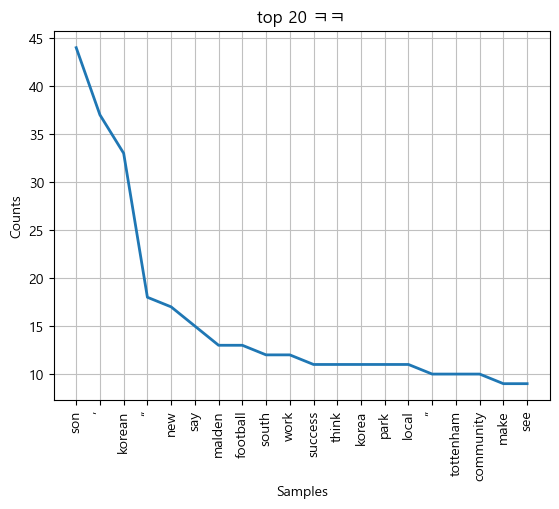

In [89]:
# plt.rcParams['font.family'] = "malgun gothic"
# plt.rcParams['axes.unicode_minus'] = False
news_text.plot(20)	# 빈도수 상위 N개를 시각화 (생략하면 전체 토큰에 대해 시각화해버림)
plt.title("top 20 ㅋㅋ")
plt.show()

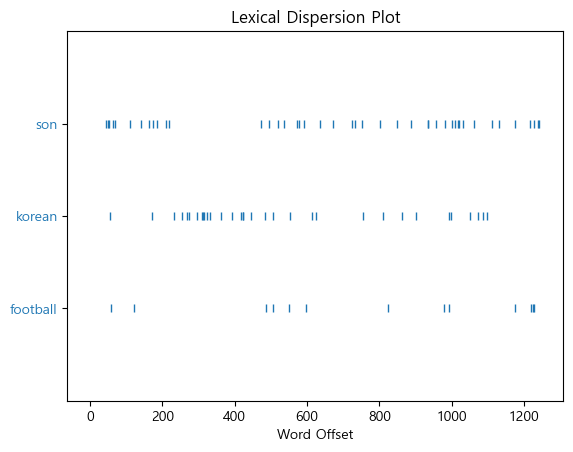

In [90]:
news_text.dispersion_plot(
	['son', 'korean', 'football']
)

## FreqDist
- document에서 사용된 토큰(단어)의 사용 빈도수와 관련 정보를 조회할 수있는 분석 클래스.
    - 토큰(단어)를 key, 개수를 value로 가지는 딕셔너리 형태
- 생성
    - Text 객체의 vocab() 메소드로 조회한다.
    - 생성자(Initializer)에 토큰 List를 직접 넣어 생성가능
- 주요 메소드
    - B(): 출연한 고유 단어의 개수
        - [Apple, Apple] -> 1
    - N(): 총 단어수 
        - [Apple, Apple] -> 2
    - get(단어) 또는 FreqDist['단어'] : 특정 단어의 출연 빈도수
    - freq(단어): 총 단어수 대비 특정단어의 출연비율
    - most_common() : 빈도수 순서로 정렬하여 리스트로 반환

In [91]:
from nltk import FreqDist

freq = news_text.vocab()	# 객체 생성
freq2 = FreqDist(news_tokens_flatten) # 직접 빈도 정보 계산
freq2

FreqDist({'son': 44, '’': 37, 'korean': 33, '“': 18, 'new': 17, 'say': 15, 'malden': 13, 'football': 13, 'south': 12, 'work': 12, ...})

In [92]:
freq.B() # 출연한 고유 단어의 개수 출력

574

In [93]:
freq.N() # 총 단어수 출력

1247

In [94]:
word = "min-kyu"

freq.get(word), freq2[word]	# 특정 단어의 출연수 메소드(.get) or FreqDist 객체에 단어를 넣어서 조회

(7, 7)

In [95]:
freq.freq(word)	# 특정 단어의 출연 비율 

0.0056134723336006415

In [96]:
freq.get(word) / freq.N()	# 위와 같은걸 알 수 있다 !

0.0056134723336006415

In [97]:
freq.most_common(15)	# 빈도수 상위(숫자로 제한 가능)

[('son', 44),
 ('’', 37),
 ('korean', 33),
 ('“', 18),
 ('new', 17),
 ('say', 15),
 ('malden', 13),
 ('football', 13),
 ('south', 12),
 ('work', 12),
 ('success', 11),
 ('think', 11),
 ('korea', 11),
 ('park', 11),
 ('local', 11)]

# Word Cloud

- 텍스트의 단어의 빈도수를 시각적으로 표현하는 도구로 **문서의 주요 키워드들을 시각적으로 확인할 때 사용한다.**
     - 빈도수가 높은 단어는 크고 굵게, 빈도수가 낮은 단어는 작고 얇게 표현한다.
- wordcloud 패키지 사용
     - 설치: `pip install wordcloud`

In [98]:
from wordcloud import WordCloud
# 1. wordcloud 객체 생성 : 어떻게 그릴지 설정
wc = WordCloud(
	max_words=200,			# 최대 몇개 단어를 사용해서 그릴지,
							# (입력 단어(토큰)이 지정한 개수보다 많을 경우 빈도수 많은 순서로 선택)
	prefer_horizontal=0.5,	# 가로 방향으로 쓴 단어의 비율
	min_font_size = 1,		# 시작 폰트 크기
	relative_scaling=0.5,	# 빈도수가 증가할 때 마다 폰트크기를 얼마나 키울지 (0.5 -> 50%)
	width = 400,
	height = 300,
	background_color = "white"
)

In [99]:
# 2. wordcloud 객체에 data를 넣어서 graph 생성
wc_img = wc.generate_from_frequencies(freq)	# {단어 : 빈도수, 단어2 : 빈도수, ...}

In [100]:
# 파일로 저장
wc_img.to_file("news_cloud.png")

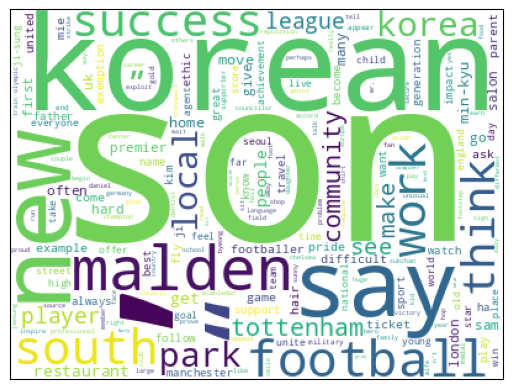

In [101]:
plt.imshow(wc_img)
plt.xticks([])
plt.yticks([])
plt.show()